In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(12,10)})

import warnings
warnings.filterwarnings("ignore")

In [2]:
import random 
random.seed(0)

In [3]:
data=pd.read_csv("C:\\Users\\ASUS\\Desktop\\ml geeks\\titanic\\titanic_data.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#here we are going to get two parameters as Pclass and Sex

In [7]:
dict_live={
 0:"Died",
 1:"Survived"   
}

dict_sex={
    'male':0,
    'female':1
}

data['Bsex']=data['Sex'].apply(lambda x:dict_sex[x])
#features

features=data[['Pclass','Bsex']]


In [8]:
features

,Pclass,Bsex
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,1
889,1,0


In [9]:
labels=data['Survived'].to_numpy()
features=data[['Pclass','Bsex']].to_numpy()

## Splitting of the Data

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.30,random_state=0)

# Multi_Layer Perceptron

 ### Activation function and Derivation

In [11]:
# sigmoid
def Sigmoid(x,derivative=False):
    if derivative==True:
        f=1/(1+np.exp(-x))*(1-1/(1+np.exp(-x)))
    else:
        f=1/(1+np.exp(-x))
    return f
def ReLU(x,derivative=False):
    if derivative==True:
        f=np.heaviside(x,1)
    else:
        f=np.maximum(x,0)

    return f

### Training Model

In [79]:
def train_ANN(xtrain,ytrain,h1_units=4,h2_units=4,learning_rate=0.0015):
    random.seed(101)
      
    #hidden layer 1
    w1=2*np.random.rand(h1_units,xtrain.shape[1])
    b1=np.random.rand(h1_units)

    #hidden layer 2
    w2=2*np.random.rand(h2_units,h1_units)
    b2=np.random.rand(h2_units)

    #output layer 
    w_out=2*np.random.rand(h2_units)
    b_out=np.random.rand(1)

    loss=[]
    vec_y=[]
    for i in range(0,xtrain.shape[0]):
        x_data=xtrain[i]
        #2. Feed forward

        h1=ReLU(np.dot(w1,x_data)+b1) # hidden layer 1 output
        h2=ReLU(np.dot(w2,h1)+b2)  # hidden layer 2 output
        y=Sigmoid(np.dot(w_out,h2)+b_out) #output of the output layer

        # 3 Backpropagate- calculater the layer derivatives
        delta_out=(y-ytrain[i])*Sigmoid(y,derivative=True)
        delta_2=delta_out*w_out*ReLU(h2,derivative=True)
        delta_1=np.dot(delta_2,w2)*ReLU(h1,derivative=True)

        
       #4 Gradient descent
        w_out=w_out-learning_rate * delta_out * h2 # output layer
        b_out=b_out-learning_rate* delta_out

       # hidden layer 2
        w2=w2 -learning_rate* np.kron(delta_2,h1).reshape(h2_units,h1_units)
        b2=b2-learning_rate*delta_2

       
       # hidden layer 1
        w1=w1 -learning_rate* np.kron(delta_1,x_data).reshape(h1_units,x_data.shape[0])
        b1=b1-learning_rate*delta_1
      # cost
        loss.append((1/2)*(y-ytrain[i])**2)
        vec_y.append(y[0])

    batch_loss=[]
    for i in range(0,10):
       loss_avg=0
       for m in range(0,60):
           loss_avg+=vec_y[60*i+m]/60
       batch_loss.append(loss_avg)
       
    plt.figure(figsize=(10,6))
    plt.plot(np.arange(1,len(batch_loss)+1),batch_loss)
    plt.title('Average Loss by epoch',fontsize=20)
    plt.xlabel('Epoch',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.show()
    return w1,b1,w2,b2,w_out,b_out,loss

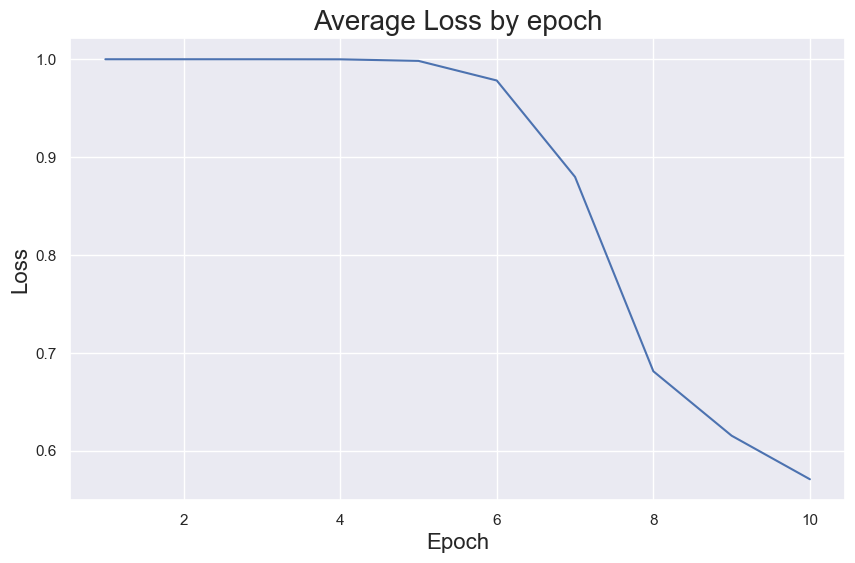

In [80]:
w1,b1,w2,b2,w_out,b_out,loss=train_ANN(xtrain,ytrain)

### testing module

In [81]:
def ANN_pred(xtest,w1,b1,w2,b2,w_out,b_out):
    pred=[]
    for i in range(0, xtest.shape[0]):
        x=xtest[i]
        #2.feed Forward
        z1=ReLU(np.dot(w1,x)+b1) # hidden layer 1 output
        z2=ReLU(np.dot(w2,z1)+b2)  # hidden layer 2 output
        y=Sigmoid(np.dot(w_out,z2)+b_out) #output of the output layer

        pred.append(np.heaviside(y-0.5,1)[0])

    return np.array(pred)

In [82]:
predictions=ANN_pred(xtest,w1,b1,w2,b2,w_out,b_out)

## Model Evaluation

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,predictions)
acc=accuracy_score(ytest,predictions)

In [84]:
cm

array([[119,  49],
       [ 16,  84]], dtype=int64)

In [85]:
acc

0.7574626865671642

In [86]:
df_cm=pd.DataFrame(cm,index=[dict_live[i] for i in range(0,2)],columns=[dict_live[i] for i in range(0,2)])

In [87]:
df_cm

,Died,Survived
Died,119,49
Survived,16,84
